In [1]:
#versions

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3


In [2]:
# libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
import pandas as pd
df = pd.read_excel (r'C:\Users\hp\Desktop\Slab_strength.xls')

In [4]:
print (df)

     slab_height  slab_weight  slab_width  slab_length Slab_strength
0            6.2          4.6         2.5          1.3           Low
1            5.0          4.0         2.5          1.3           Low
2            5.8          4.3         2.4          1.3           Low
3            5.7          4.2         2.6          1.3           Low
4            6.1          4.7         2.5          1.3           Low
5            6.5          4.0         2.8          1.5           Low
6            5.7          4.5         2.5          1.4           Low
7            6.1          4.5         2.6          1.3           Low
8            5.5          3.1         2.5          1.3           Low
9            5.0          4.2         2.6          1.2           Low
10           6.5          4.8         2.6          1.3           Low
11           5.9          4.5         2.7          1.3           Low
12           5.9          4.0         2.5          1.2           Low
13           5.4          4.0     

In [5]:
print(df.shape)

(156, 5)


In [6]:
# head
print(df.head(55))

    slab_height  slab_weight  slab_width  slab_length Slab_strength
0           6.2          4.6         2.5          1.3           Low
1           5.0          4.0         2.5          1.3           Low
2           5.8          4.3         2.4          1.3           Low
3           5.7          4.2         2.6          1.3           Low
4           6.1          4.7         2.5          1.3           Low
5           6.5          4.0         2.8          1.5           Low
6           5.7          4.5         2.5          1.4           Low
7           6.1          4.5         2.6          1.3           Low
8           5.5          3.1         2.5          1.3           Low
9           5.0          4.2         2.6          1.2           Low
10          6.5          4.8         2.6          1.3           Low
11          5.9          4.5         2.7          1.3           Low
12          5.9          4.0         2.5          1.2           Low
13          5.4          4.0         2.2        

In [7]:

print(df.describe())

       slab_height  slab_weight  slab_width  slab_length
count   156.000000   156.000000  156.000000   156.000000
mean      6.785897     4.051282    4.742949     2.285256
std       0.926697     0.503342    1.752569     0.768224
min       5.000000     3.000000    2.000000     1.100000
25%       6.100000     3.800000    2.600000     1.400000
50%       6.750000     4.000000    5.300000     2.400000
75%       7.425000     4.400000    6.200000     2.900000
max       9.000000     5.500000    7.800000     3.600000


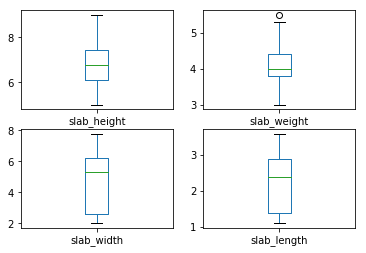

In [8]:

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [9]:
import seaborn as sns

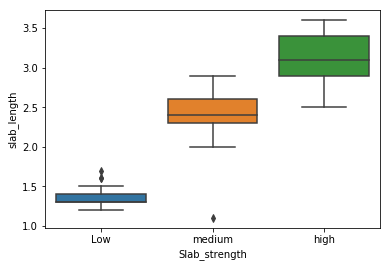

In [11]:
sns.boxplot(x="Slab_strength", y="slab_length", data=df )
plt.show()

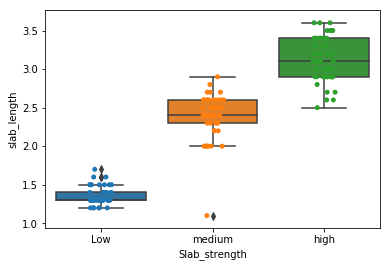

In [26]:
ax= sns.boxplot(x="Slab_strength", y="slab_length", data=df)
ax= sns.stripplot(x="Slab_strength", y="slab_length", data=df, jitter=True, edgecolor="gray")
plt.show()

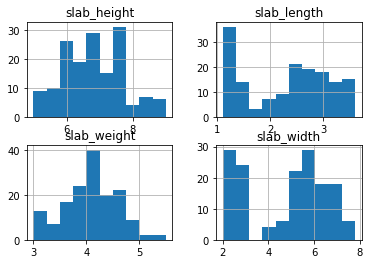

In [12]:
df.hist()
plt.show()

<Figure size 432x288 with 0 Axes>

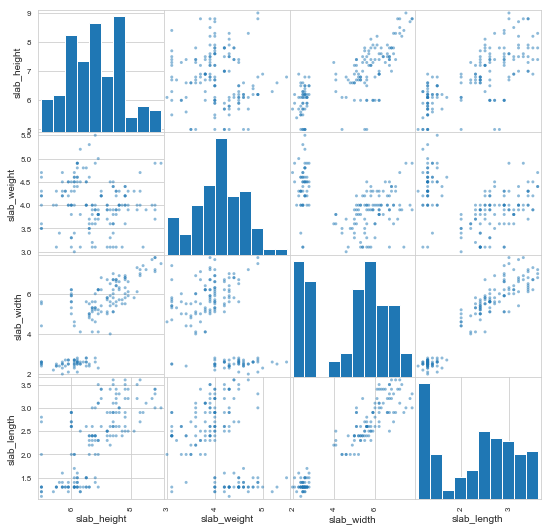

<Figure size 432x288 with 0 Axes>

In [42]:
pd.plotting.scatter_matrix(df,figsize=(9,9))
plt.figure()

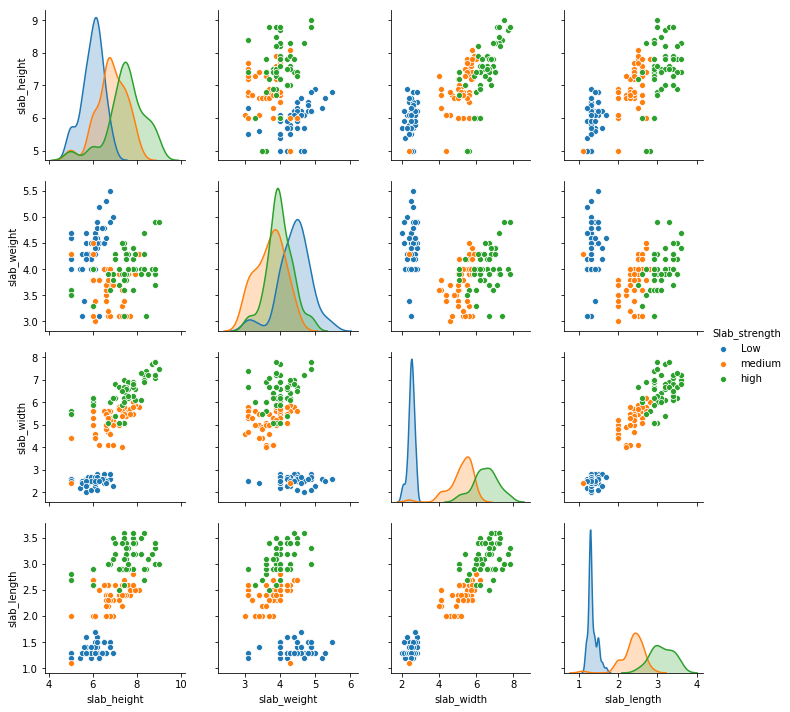

In [27]:
sns.pairplot(df, hue="Slab_strength")

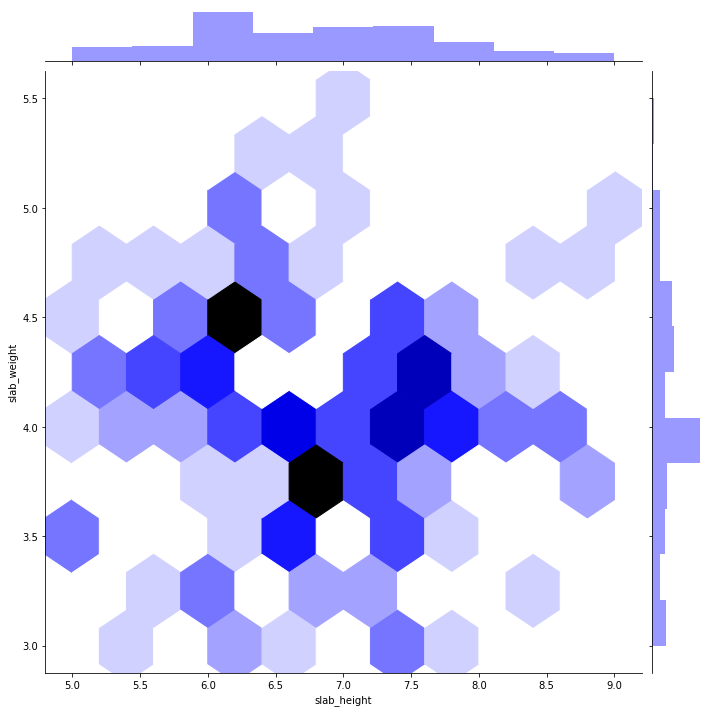

In [29]:
sns.jointplot(x="slab_height", y="slab_weight", data=df, height=10,ratio=10, kind='hex',color='blue')
plt.show()

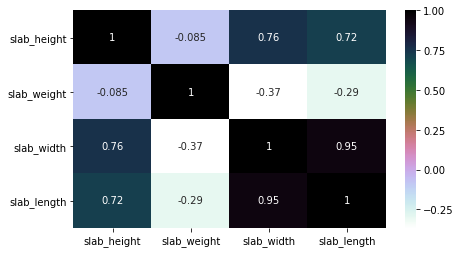

In [30]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [14]:

array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [15]:

seed = 7
scoring = 'accuracy'

In [16]:

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

LR: 0.943590 (0.052533)
LDA: 0.944872 (0.060624)
KNN: 0.959615 (0.064870)
CART: 0.958974 (0.055455)
NB: 0.935897 (0.060065)
SVM: 0.951923 (0.064183)


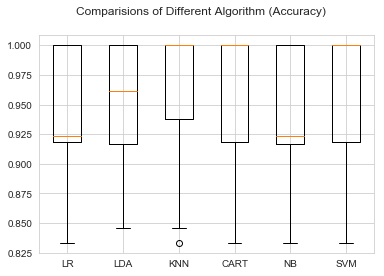

In [39]:

fig = plt.figure()
fig.suptitle('Comparisions of Different Algorithm (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.90625
[[ 9  0  0]
 [ 0 11  1]
 [ 1  1  9]]
              precision    recall  f1-score   support

         Low       0.90      1.00      0.95         9
        high       0.92      0.92      0.92        12
      medium       0.90      0.82      0.86        11

   micro avg       0.91      0.91      0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# creating list 
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

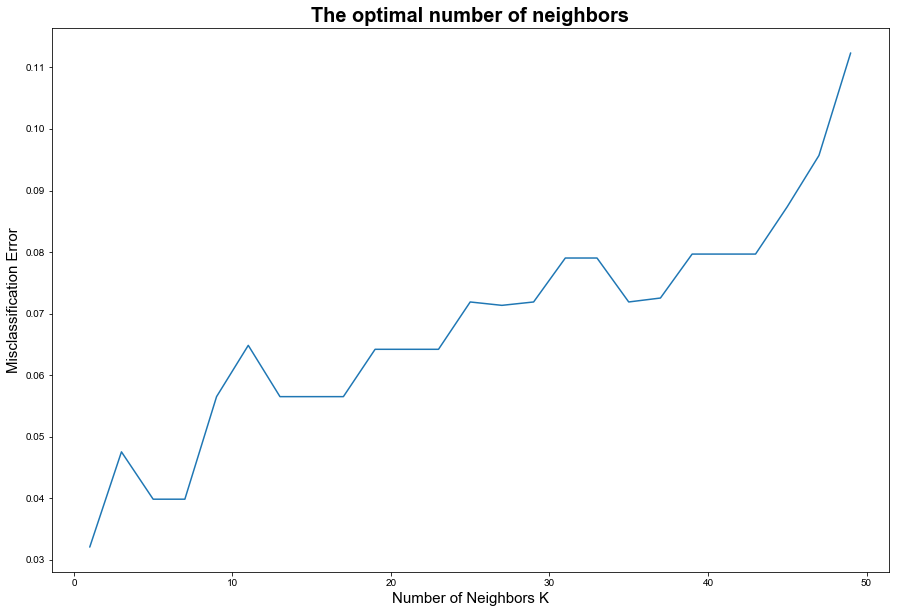

In [38]:
# Change misclassification 
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [19]:
from sklearn.svm import SVC
model=SVC()

In [20]:
model.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
pred=model.predict(X_validation)

In [22]:

from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(Y_validation,pred))

[[ 9  0  0]
 [ 0 11  1]
 [ 1  1  9]]


In [24]:
print(classification_report(Y_validation, pred))


              precision    recall  f1-score   support

         Low       0.90      1.00      0.95         9
        high       0.92      0.92      0.92        12
      medium       0.90      0.82      0.86        11

   micro avg       0.91      0.91      0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32



In [33]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, Y_train)

y_pred = Model.predict(X_validation)


print(classification_report(Y_validation, y_pred))
print(confusion_matrix(Y_validation, y_pred))


              precision    recall  f1-score   support

         Low       0.90      1.00      0.95         9
        high       0.80      1.00      0.89        12
      medium       1.00      0.64      0.78        11

   micro avg       0.88      0.88      0.88        32
   macro avg       0.90      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32

[[ 9  0  0]
 [ 0 12  0]
 [ 1  3  7]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
Model = GaussianNB()
Model.fit(X_train, Y_train)

y_pred = Model.predict(X_validation)

print(classification_report(Y_validation, y_pred))
print(confusion_matrix(Y_validation, y_pred))


              precision    recall  f1-score   support

         Low       0.90      1.00      0.95         9
        high       1.00      0.92      0.96        12
      medium       0.91      0.91      0.91        11

   micro avg       0.94      0.94      0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

[[ 9  0  0]
 [ 0 11  1]
 [ 1  0 10]]
